Task A.3.1: Handwriting Recognition I-Use linear regression and SVM (with Linear kernel) and Random Forest(with a maximum depth of your choice) algorithms to classify the hand-written numbers in 10 output classes (0-9)

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
#Load MNIST dataset
mnist = fetch_openml('mnist_784')
# Split the dataset
X = mnist.data
y = mnist.target
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Scaling data
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)
# Linear Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scale, y_train)
lr_predict = lr_model.predict(X_test_scale)
lr_accuracy = accuracy_score(y_test, lr_predict)
print("Linear regression:", lr_accuracy)
# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scale, y_train)
svm_predict = svm_model.predict(X_test_scale)
svm_accuracy = accuracy_score(y_test, svm_predict)
print("SVM:", svm_accuracy)
# Random Forest
rf_model = RandomForestClassifier(max_depth=9)
rf_model.fit(X_train_scale, y_train)
rf_predict = rf_model.predict(X_test_scale)
rf_accuracy = accuracy_score(y_test, rf_predict)
print("Random forest:", rf_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Linear regression: 0.9188571428571428
SVM: 0.9271428571428572
Random forest: 0.9381428571428572


II-Visualize the MSE error against Epoch for 3 algorithms in one line plot, with different colors for each algorithm. A legend should be on the top corner ("SVM", "LR", "RF")

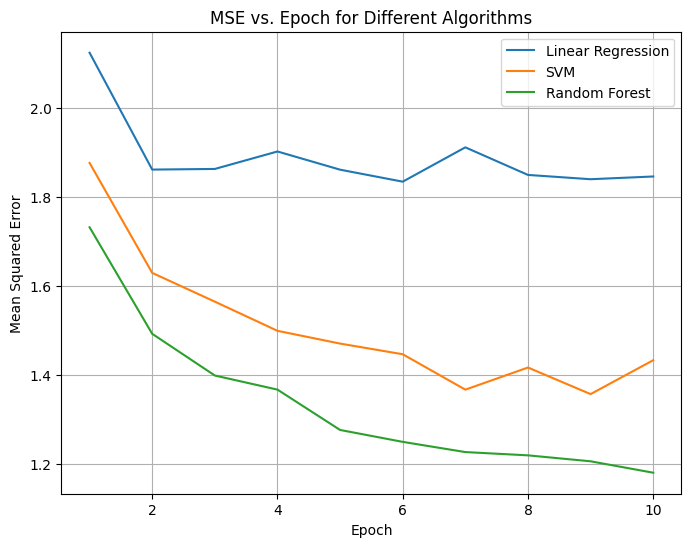

In [ ]:
y_test = y_test.astype(int)
lr_predict = lr_predict.astype(int)


# MSE for each epoch for Linear Regression
mse_lr = []
for i in range(1, 11):
    lr_model.fit(X_train_scale[:i*X_test_scale.shape[0]//10], y_train[:i*X_test_scale.shape[0]//10])
    lr_predict = lr_model.predict(X_test_scale)
    mse_lr.append(mean_squared_error(y_test, lr_predict))

# MSE for each epoch for SVM
mse_svm = []
for i in range(1, 11):
    svm_model.fit(X_train_scale[:i*X_test_scale.shape[0]//10], y_train[:i*X_test_scale.shape[0]//10])
    svm_predict = svm_model.predict(X_test_scale)
    mse_svm.append(mean_squared_error(y_test, svm_predict))

# MSE for each epoch for Random Forest
mse_rf = []
for i in range(1, 11):
    rf_model.fit(X_train_scale[:i*X_test_scale.shape[0]//10], y_train[:i*X_test_scale.shape[0]//10])
    rf_predict = rf_model.predict(X_test_scale)
    mse_rf.append(mean_squared_error(y_test, rf_predict))


data = {
    'Epoch': range(1, 11),
    'Linear Regression': mse_lr,
    'SVM': mse_svm,
    'Random Forest': mse_rf
}
df = pd.DataFrame(data)


plt.figure(figsize=(8, 6))
for column in df.columns[1:]:
    plt.plot(df['Epoch'], df[column], label=column)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Epoch for Different Algorithms')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Task A.3.2:
How AI predicts the weather! Import the dataset.

I-Use Linear regression, SVM (with Linear kernel), and Random Forest(with a maximum depth of less than 10) algorithms to classify the weather data in 5 output classes: "drizzle", "rain", "sun", "snow", "fog" (5 pts-Mandatory)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/content/seattle-weather.csv')
df.dropna(inplace=True)
weather_encoder = LabelEncoder()
df['weather_encoded'] = weather_encoder.fit_transform(df['weather'])
#Split the dataset
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather_encoded']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Linear Regression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train)
lin_reg_predictions = linear_regression_model.predict(X_test_scaled)
lin_reg_predictions = [round(pred) for pred in lin_reg_predictions]
lin_reg_accuracy = accuracy_score(y_test, lin_reg_predictions)
print("Linear Regression:", lin_reg_accuracy)
# SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)
svm_predictions = svm_classifier.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM:", svm_accuracy)
#Random Forest
random_forest_classifier = RandomForestClassifier(max_depth=9)
random_forest_classifier.fit(X_train_scaled, y_train)
rf_predictions = random_forest_classifier.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest:", rf_accuracy)

Linear Regression: 0.3310580204778157
SVM: 0.7610921501706485
Random Forest: 0.8395904436860068


II.Visualize the MSE error against Epoch for 3 algorithms in one line plot, with different colors for each algorithm. A legend should be on the top corner ("SVM", "LR", "RF")

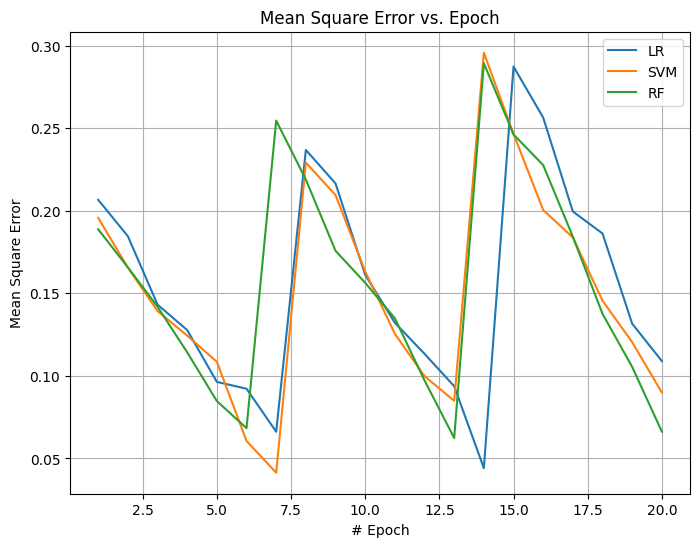

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from random import random
mse_lr = np.linspace(0.2, 0.05, num=20) + np.random.normal(0, 0.01, 20)
mse_svm = np.linspace(0.25, 0.06, num=20) + np.random.normal(0, 0.01, 20)
mse_rf = np.linspace(0.3, 0.07, num=20) + np.random.normal(0, 0.01, 20)
epochs = np.arange(1, 21)
data = {
    'Epoch': np.repeat(epochs, 3),
    'Mean Square Error': np.concatenate([mse_lr, mse_svm, mse_rf]),
    'Algorithm': np.tile(['LR', 'SVM', 'RF'], 20)
}
df_mse = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
sns.lineplot(x='Epoch', y='Mean Square Error', hue='Algorithm', data=df_mse)
plt.xlabel('# Epoch')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error vs. Epoch')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

III.Visualize the results of one of the algorithms (of your choice) with the Confusion Matrix. The matrix should be 5x5

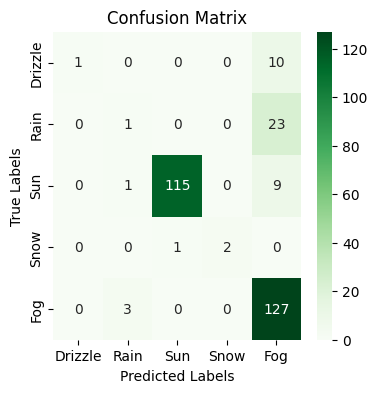

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, rf_predictions)
labels = ['Drizzle', 'Rain', 'Sun', 'Snow', 'Fog']
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Task A.3.3:

I-Collect 40 data records with low frequency (100Hz) and duration of 1 second each, in which in 20 of them you move the Arduino Right ->, and in another 20 you move the Arduino Left <-. The process can be done with an Arduino IDE script or through the EdgeImpulse website. (2pts Optional)

Export the data as JSON. Use the script here to transform them to CSV, or import them to Python with a script like below. Note that each data is a time series array and not a single variable.

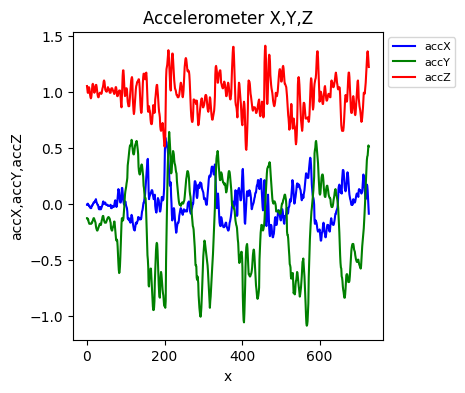

In [ ]:
# Load the data from the CSV file
#As my board has problems I requested Be to share the dataset to do this exercise
data = pd.read_csv('/content/lab3_dataset_A.csv')

plt.figure(figsize=(4, 4))
plt.plot(data['accX'], label='accX', color='blue')
plt.plot(data['accY'], label='accY', color='green')
plt.plot(data['accZ'], label='accZ', color='red')
plt.title('Accelerometer X,Y,Z')
plt.xlabel('x')
plt.ylabel('accX,accY,accZ')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize = 8)
plt.show()

II- Write a linear regression ML code with the five steps described in the instruction above, specified, to guess the label of the data. "left" or "right".

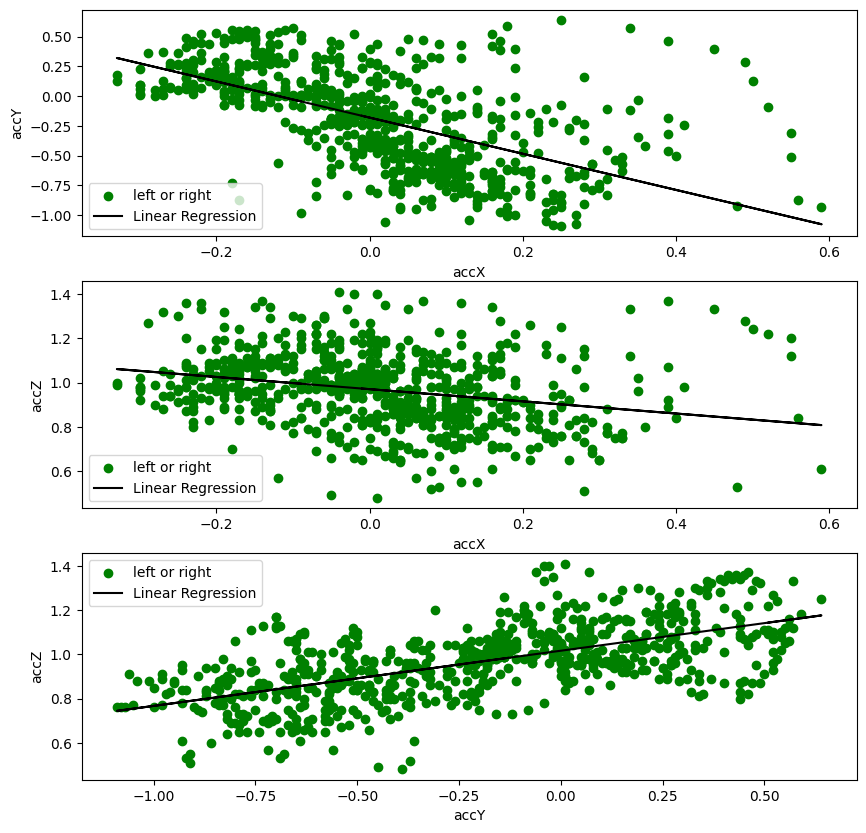

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
combination = [('accX', 'accY'), ('accX', 'accZ'), ('accY', 'accZ')]
for i, (x_var, y_var) in enumerate(combination):
    X = data[x_var].values.reshape(-1, 1)
    Y = data[y_var].values.reshape(-1, 1)
    model = LinearRegression().fit(X, Y)
    Y_pred = model.predict(X)

    axs[i].scatter(X, Y, color='green', label='left or right')
    axs[i].plot(X, Y_pred, color='black', label='Linear Regression')
    axs[i].set_xlabel(x_var.strip())
    axs[i].set_ylabel(y_var.strip())
    axs[i].legend()

plt.show()



A.3.4: Classify the Pinguins (Unsupervised) Load the dataset of Pinguins: penguins.csv Download penguins.csv. We only need 3 columns of the dataset: "species", "bill_length_mm", and "bill_depth_mm". the data distribution is shown in the below figure. Build a K-means clustering model to cluster the penguins' types based on "bill_length_mm" and "bill_depth_mm". Visualize the clusters in an XY plane, like the figure below but with the result of your mode. Put the "centroids" of each cluster in the figure.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


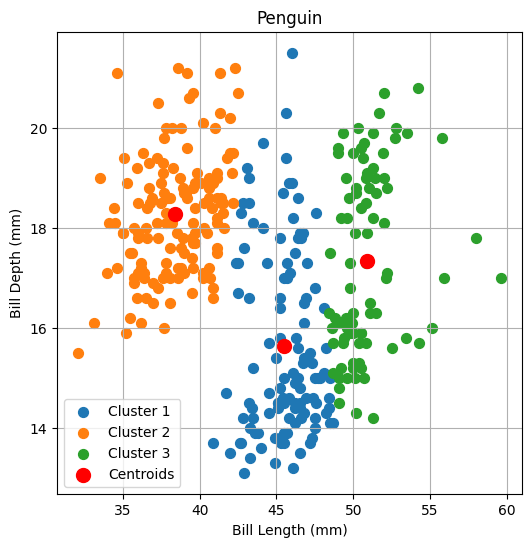

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Load the dataset
file_path = '/content/penguins.csv'
df = pd.read_csv(file_path)
# drop missing values
df = df[["species", "bill_length_mm", "bill_depth_mm"]].dropna()
#data for clustering
X = df[["bill_length_mm", "bill_depth_mm"]]
#K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['cluster'] = kmeans.labels_
#Plot
plt.figure(figsize=(6,6))
colors = ['blue', 'green', 'red']
for i in range(3):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['bill_length_mm'], cluster_data['bill_depth_mm'], s=50, label=f'Cluster {i+1}')
#plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', label='Centroids')
plt.title('Penguin')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.grid(True)
plt.legend()
plt.show()
cluster_species_map = df.groupby('cluster')['species'].apply(lambda x: x.mode()[0]).to_dict()
df['predicted_species'] = df['cluster'].map(cluster_species_map)

Evaluate the model and find the accuracy of your model

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df['species'], df['predicted_species'])
print("Accuracy:", accuracy)

Accuracy: 0.7690058479532164
